In [3]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.models.var_feedforward import build_var_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
import theano
import theano.tensor as T
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')

#X_train = X_train**2
#X_test = X_test**2

In [69]:
X_train.shape

(2640, 597)

In [3]:
batch_size = 25
lr = theano.shared(10**(-6))
log_alphas = theano.shared(np.array([100.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward,  structure = [X_train.shape[1], 1], nonlinearity=lambda x:x, log_alphas=log_alphas, bias=True)
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

2765.0666883785198

In [7]:
def mse(Y1, Y2):
    return np.sqrt(np.mean((Y1 - Y2)**2))

In [10]:
#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
for epoch in xrange(100):
    
    for i in xrange(100):
        training_procedure.do_train()
    
    Y = predict(X_test)
    err.append(mse(Y[:,0], Y_test))
    
    print err[-1]

0.762562593193
0.771031390481
0.764298774075
0.762491150213
0.765302906308
0.766557332522
0.763744215835
0.762553499246
0.760614094594
0.765521201715
0.776349622423
0.761598489039
0.763413475
0.761986106053
0.76485324118
0.770965883713
0.770700720251
0.766256356558
0.762167127248
0.759451822828
0.772201210589
0.774583637076
0.775090932856
0.769044463493
0.769234437889
0.771039171373
0.774542762074
0.767465662567
0.770214650477
0.767267585713
0.783444630985
0.765910212593
0.771660240477
0.778642198132
0.771963007414
0.767447774955
0.767945166533
0.76569747637
0.766678115012
0.765073229923
0.778816013503
0.770376593743
0.772410888194
0.773335329478
0.770190971794
0.769124727971
0.766491548872
0.784601634184
0.768185563528
0.769013758172
0.781493562749
0.77154944301
0.76904162806
0.770233046402
0.776636030801
0.770120358142
0.77605545903
0.773063669992
0.77304462664
0.771575008299
0.777701666648
0.76909932293
0.770527812723
0.767741186188
0.765681200608
0.770270519248
0.770665968375
0.770

In [15]:
err

[824547.25317786122,
 147408.32623094242,
 153250.40688068373,
 159423.04218149051,
 162519.1732141001,
 151288.96791674779,
 151484.38303694574,
 155177.44784261737,
 149679.61694278329,
 151739.01733152277,
 148517.63642891592,
 151628.21294158677,
 167830.91059503896,
 150061.63926302467,
 151233.92544622323,
 151489.79467718137,
 147885.29858569134,
 149870.0046627291,
 149733.51905332814,
 150979.34251512965,
 152633.19882078649,
 152510.55879122237,
 153673.42501020027,
 148036.10774325044,
 147504.53827504106,
 149280.69364801375,
 150816.93581606439,
 155746.8666185957,
 153615.99173373781,
 150932.07153648345,
 148132.50759642365]

56.3928841182 52.8324685489


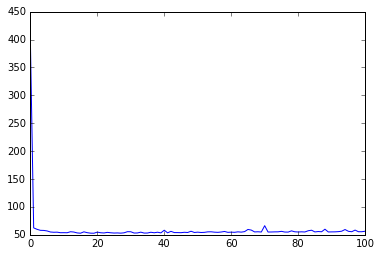

In [48]:
plt.plot(err)
print err[-1], np.min(err)

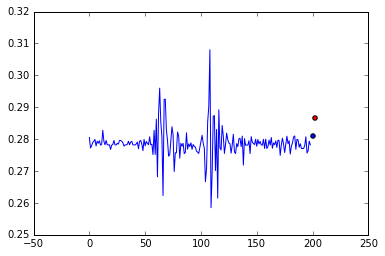

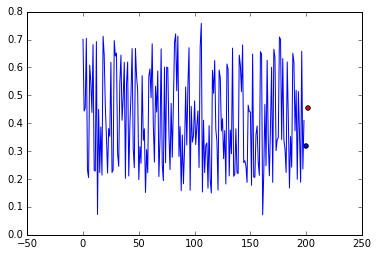

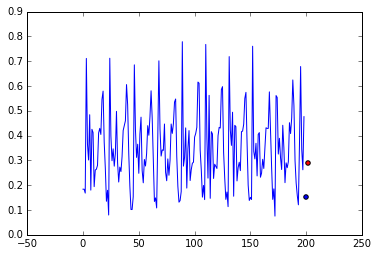

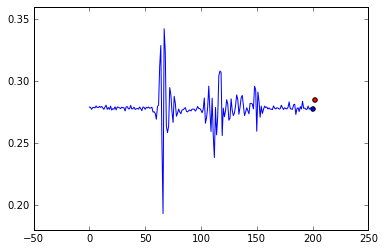

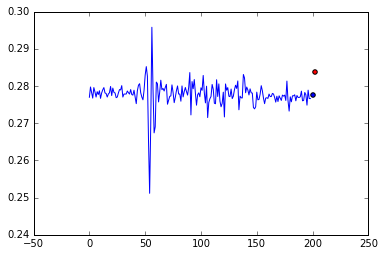

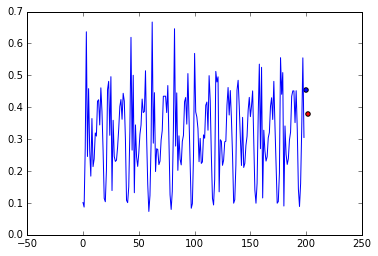

In [21]:
for i in [-2 , 15, 271, -1, -5, 123]:
    plt.plot(X_test[i])
    plt.scatter(200, Y_test[i])
    plt.scatter(202, predict([X_test[i]]), c='r')
    plt.show()

In [8]:
batch_size = 25
hid = 10
lr = theano.shared(10**(-6))
log_alphas = theano.shared(np.array([-6]))
inits = np.sqrt([2.0/X_test.shape[1], 2.0/hid])

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward,  structure = [X_train.shape[1], hid,   1],  init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), log_alphas=log_alphas, bias=True)
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,   batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

In [9]:
#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
print err[-1]
for epoch in xrange(25):
    
    for i in xrange(100):
        res =    training_procedure.do_train()
    #print res
    Y = predict(X_test)
    err.append(mse(Y[:,0], Y_test))
    #if epoch%10==0:
    
    print err[-1], res


3.26282362582
1.72901257397 -1422222.15549
1.73009193592 -1420903.20911
1.72996720589 -1421706.94222
1.73036785767 -1421314.82711
1.72968003763 -1421032.05957
1.730229519 -1420393.72691
1.73014576486 -1421215.49392
1.73094745602 -1420828.13695
1.7297452709 -1421309.06761
1.72950881109 -1422405.68426
1.73077955955 -1421388.09052
1.72976613994 -1422269.51547
1.72948556872 -1421727.53461
1.72984235771 -1421555.93006
1.72982620037 -1421319.14401
1.73067457921 -1421293.3659
1.72991292628 -1423038.02773
1.72868623831 -1421688.5715
1.72875975605 -1423023.60436
1.72905528646 -1421942.41202
1.73009375094 -1420764.96443
1.73069097624 -1421296.8118
1.72925069194 -1421866.29468
1.72893405085 -1421671.7025
1.72871140799 -1422843.88681


In [ ]:
batch_size = 25
hid = 10
lr = theano.shared(10**(-6))
param_num = X_train.shape[1]*hid+hid+hid*1+1
log_alphas = theano.shared(np.array([6]*param_num))
inits = np.sqrt([2.0/X_test.shape[1], 2.0/hid])

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_var_feedforward, param_pool_size=25,
                      structure = [X_train.shape[1], hid,   1],  init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), 
                      log_alphas=log_alphas, bias=True, log_var_sigmas=np.array([-2.0]*param_num))
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,   batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

In [ ]:
#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
print err[-1]
for epoch in xrange(50):
    
    for i in xrange(100):
        res =    training_procedure.do_train()
    #print res
    Y = predict(X_train)
    err.append(mse(Y[:,0], Y_train))
    #if epoch%10==0:
    print err[-1], res, np.sum((Y[:, 0]-Y_train)**2)


2.0349759737
1.52145617675 -50737.3350085 6111.14829012
1.28446405716 -49882.6767557 4355.59849332
1.19565800699 -49013.938653 3774.13890397
1.1595050735 -48874.5716832 3549.35332088
1.12310266092 -49522.0403913 3329.98930959


In [11]:
np.min(model.params.eval()[param_num:])

-2.4688041248559012